# Cahier de manip pour le projet Balaise.
Auteur : Juls
Date : oct. 2025

In [1]:
import seaborn as sns

custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 1.25,
    "figure.dpi": 200,
    "text.usetex": True,
    "font.family": "serif"}
sns.set_theme(context = "notebook", style="ticks", rc=custom_params) 

## 06/10/2025

### Understanding the input file's parameters.

```yaml
# Units for length, time and mass are micrometers, seconds and
# milligrams

# Select integrator
scheme					                       stochastic_adams_bashforth_rollers

# Define implementation to compute the blobs mobility 
mobility_vector_prod_implementation    numba
mobility_blobs_implementation            C++

# Define implementation to compute the blobs-blob force and pass its arguments
blob_blob_force_implementation	       numba
repulsion_strength	   		            0.0165677856
debye_length	   			                 0.06

# Set time step, number of steps and save frequency
dt		 	   	     	                     0.01
n_steps					                       1000
n_save  				                       1
initial_step				                   0
solver_tolerance			                 1e-3

# Set viscosity, gravity and blob radius
# In units of micrometers, seconds and milligrams
eta					                           1.0e-3
g					                         3.75e-7 # grvaity * blob_mass = 9.81 * 4/3 * pi * blob_radius**3 * (rho_silica - rho_wota) = 9.81e6 * 4/3 * pi * 0.055**3 * (1.055 - 1.000) * 1e-9 = 3.75e-7 buoyant mass
blob_radius				                     0.055
kT					                           0.0041419464



# Set interaction with the wall
repulsion_strength_wall			           0.0165677856
debye_length_wall	   		               0.06


shear                            0 0 0 #Set to actual shear after thermalisation
periodic_length                 10 10 0 #PBC in x, y
# Seed random number generator
# seed					 1

# Set output name
output_name				                     run_blobs
save_clones				                     one_file

# Read structures
structure	../../Structures/blob.vertex sphere_array.clones
```





### Integrator :

stochastic_adams_bashforth_rollers

From ReadMe in .doc :

"* `scheme`: (string) Options: `deterministic_forward_euler_rollers,
stochastic_first_order_rollers, deterministic_adams_bashforth_rollers,
stochastic_adams_bashforth_rollers, stochastic_mid_point_rollers,
stochastic_trapezoidal_rollers`. We provide several schemes for
deterministic and stochastic simulations, but we recommend using 'stochastic_adams_bashforth_rollers'."


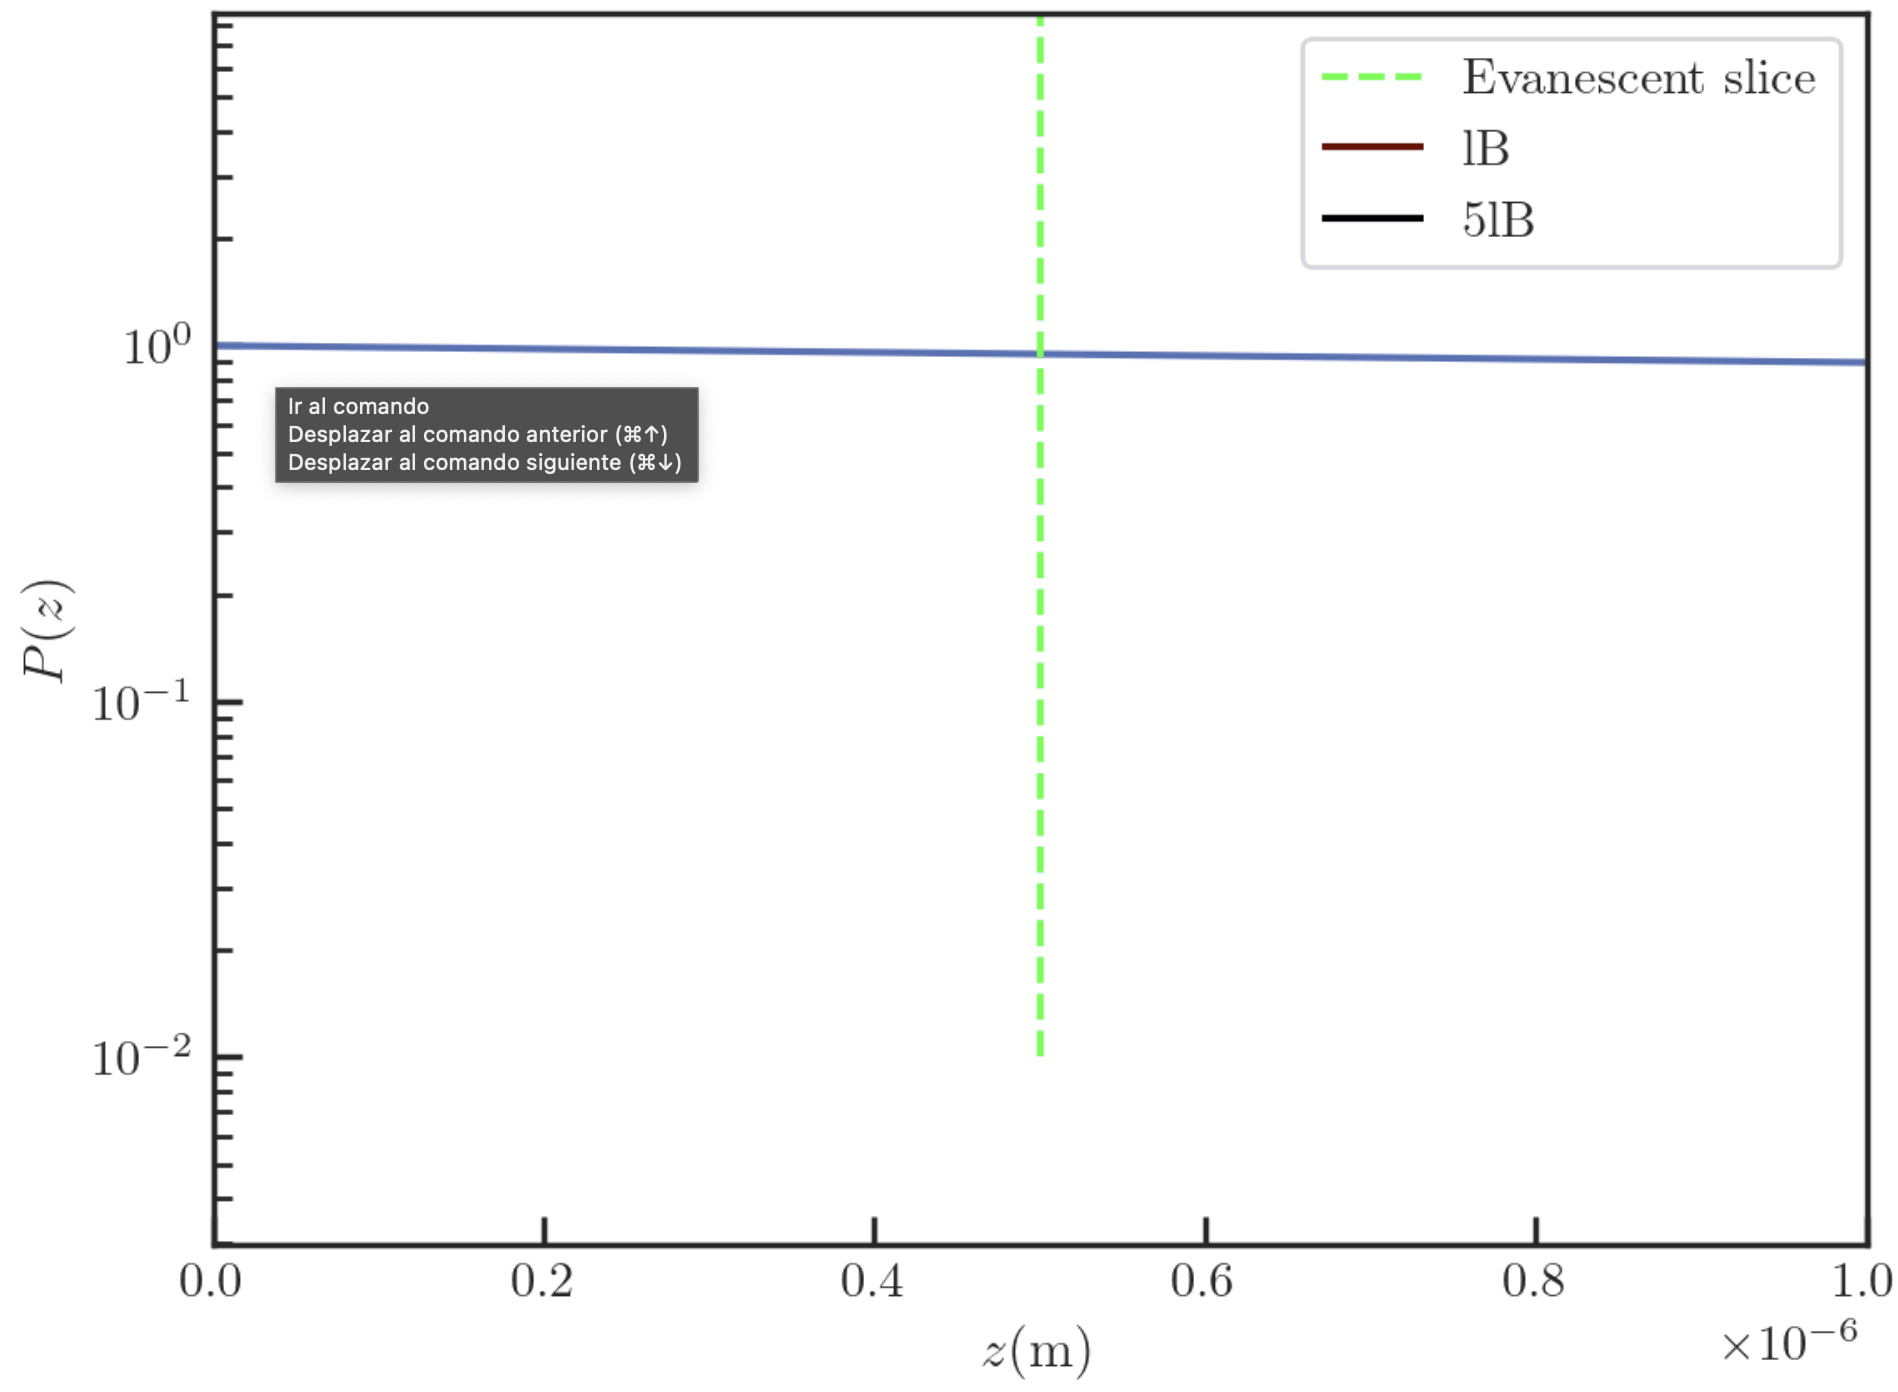

### initialisation of the simulation

python file initialize_suspensions.py

To do tomorrow : please check the functions you wrote yesterday, you were a little tired at the end of the day and may have made a mistake or two.
The, please complete the thermalisation process and launch and retrieve the simulation data.
Leave the treatment for later.

# 07/10/2025

Simulations are now correctly initialised. Below are the plots for a few sample initial positions.

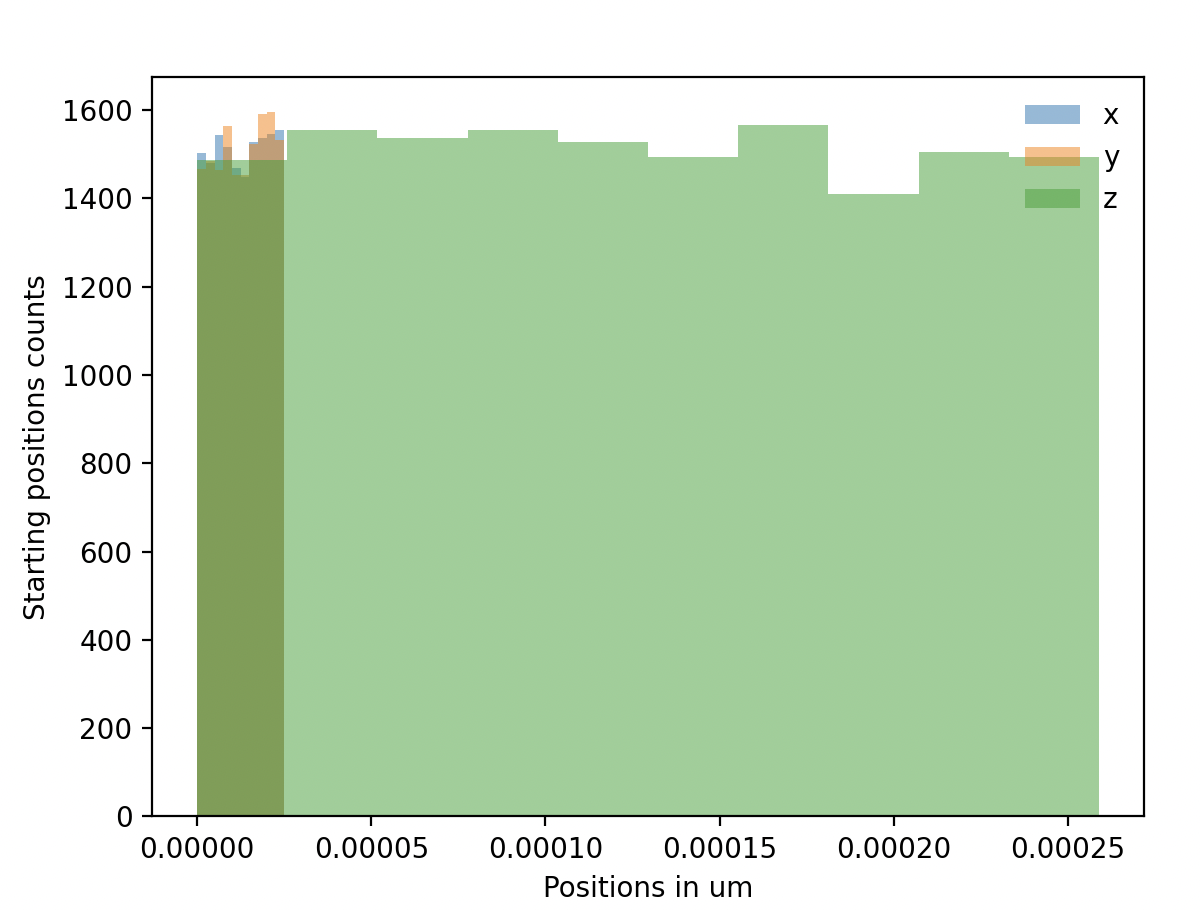

Now to apply g and let the particles sediment.
Then compute the histograms and verify they follow boltzmann.

Well, with g applied it doesnt work. 
The simulator either gets stuck in invalid configurations or doesnt even pass step 0.
I tried :

- removing g
- changing g
- removing the pbcs
- changing the cell size


To do tomorrow : Find why particles go uunder the wall at all times (maybe a problem of particle repulsion).
Buy to make oat bars for the friends.
Thermalise the suspension if time permits.

# 08/10/2025

Today i want to try making the code run on a very basic simulation just to see whether it was my previous tampering that broke it or if its my current tampering that doesn't work.

I'll Start by taking a simple 1-particle or 2-particle case in a shear, like i used to do for blaise and see.

It seems to run fine, which is nice.

I wonder now if perhaps the sphere array expects um and not meters ? Yeah ! That looks liek it ! Good job !

OK, now i want to creare a ```visualizer.py``` that takes into input a run_blobs_sphere_array.config and returns a short video of it. It will be a first check that all i asked for is being respected.

Hmm, i'm wondering if my g is not super way high. Look at this :

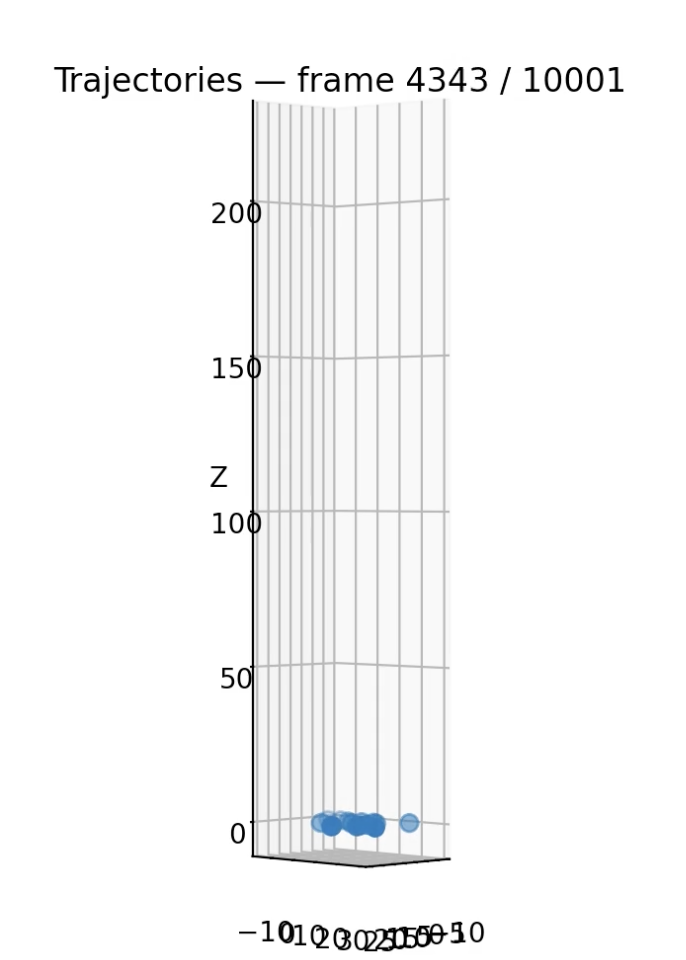

it really seems like the distribution is super peaked, like the g doesnt correspond to the right boltzmann. I have to check this.